In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Conv2D, Lambda
import tensorflow as tf
from keras.initializers import Orthogonal
from keras.layers import Activation
from tensorflow.keras.regularizers import l2

In [2]:
no_of_classes=2

In [3]:
def Dense_API():
 base_model = tf.keras.applications.VGG16(weights ="imagenet", include_top = False , input_shape=(224,224,3))
 x=Flatten()(base_model.output)
 #x = tf.keras.layers.GlobalAveragePooling2D()(x)
 pred=tf.keras.layers.Dense(no_of_classes, activation='sigmoid')(x)
  #pred = tf.keras.layers.Dense(no_of_classes, activation='softmax')(x) 
	#pred=Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.02),activation='softmax')(x)      # activation="relu", activation="sigmoid")
 model = tf.keras.models.Model(inputs = base_model.input , outputs = pred)
  
 for layer in base_model.layers:
		layer.trainable = False       # Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. 
 return model  
    

model = Dense_API()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from ast import Import
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow.keras import layers

no_of_classes = 2
epoch=20
height=224
width=224
no_channel=3
batchsize=16
learnrate=0.01


In [5]:
train_path = 'D:/Heterogeneous_Dataset_Private_5CV/set1/train'
test_path = 'D:/Heterogeneous_Dataset_Private_5CV/set1/val'

In [6]:
!pip install tqdm
from tqdm import tqdm

In [7]:
def create_data(data_dir):
	no_of_classes = 2
	CATEGORIES = ['AML','Normal'] #name of differnt class
	(height,width) = (224, 224)   # dimension to resize the input image

	data_class=[]
	data=[]
	for category in CATEGORIES:  # do dogs and cats

		path = os.path.join(data_dir,category)  # create path to directories
		class_num = CATEGORIES.index(category)  # get the classification  (0,1,2,3,4 for each directory)
		print(path)
		print(os.listdir(path))
		print(class_num)
		for img in tqdm(os.listdir(path)):      # iterate over each image per folder
			try:
				img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # read each color image
				new_array = cv2.resize(img_array, (height,width))  # resize to normalize data size
				data.append(new_array)
				data_class.append(class_num)

			except Exception as e:  # in the interest in keeping the output clean...
				pass

	return[data,data_class]

In [8]:
import numpy as np

def normalize_mean_subtraction(image_data, mean_values):
    normalized_image_data = image_data - mean_values
    return normalized_image_data


In [9]:
def read_dataset():

	no_of_classes = 2
	CATEGORIES = ['AML','Normal']  # Put the folder Name
	height=224
	width=224

	train_dir = train_path
	val_dir = test_path


	[train_list,train_class_list]=create_data(train_dir)
	x_train=np.array(train_list)
	y_train=np.array(train_class_list)
	print('train shape :', x_train.shape)
	print('train label shape :', y_train.shape)


	[val_list,val_class_list]=create_data(val_dir)
	x_val=np.array(val_list)
	y_val=np.array(val_class_list)
	print('val shape :', x_val.shape)
	print('val label shape :', y_val.shape)
	# x_train and x_test are centering

# Step 1: Calculate the mean of the x_train dataset
	#mean_image = np.mean(x_train, axis=0)

# Step 2: Subtract the mean image from both x_train and x_test
	#mean_values_train = np.mean(x_train, axis=(0, 1))
	#x_train = normalize_mean_subtraction(x_train, mean_values_train)
    # Step 3: Calculate the mean of the x_train dataset
	#mean_values_test = np.mean(x_val, axis=(0, 1))
    # Step 1: Calculate the mean of the x_train dataset
	#x_val = normalize_mean_subtraction(x_val, mean_values_test)

	#Normalize the dataset
	x_train = (x_train/255.0).astype(np.float32)
	x_val = (x_val/255.0).astype(np.float32)

	#reshape data to fit model
	x_train = x_train.reshape(x_train.shape[0],height,width,3)
	x_val = x_val.reshape(x_val.shape[0],height,width,3)


	#Convert the classes to categorical

	y_train = tf.keras.utils.to_categorical(y_train, num_classes=no_of_classes)
	y_train=y_train.reshape(y_train.shape[0],no_of_classes)

	y_val = tf.keras.utils.to_categorical(y_val, num_classes=no_of_classes)
	y_val=y_val.reshape(y_val.shape[0],no_of_classes)

	return (x_train,y_train), (x_val,y_val)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import keras
from tensorflow.keras import layers
from keras.models import Sequential
import sys
from keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ModelCheckpoint
import glob
import cv2

import os
from PIL import Image
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# Get the dataset from the datadownload file
(x_train, y_train), (x_val, y_val) = read_dataset()

D:/Heterogeneous_Dataset_Private_5CV/set1/train\AML
['114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '180.jpg', '181.jpg', '182.jpg', '183.jpg', '184.jpg', '185.jpg', '186.jpg', '187.jpg', '188.jpg', '189.jpg', '190.jpg', '191.jpg', '192.jpg', '193.jpg', '194.jpg', '195.jpg', '196.jpg', '197.jpg', '198.jpg', '199.jpg', '

100%|████████████████████████████████████████████████████████████████████████████████| 542/542 [00:25<00:00, 21.16it/s]


D:/Heterogeneous_Dataset_Private_5CV/set1/train\Normal
['114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', '174.jpg', '175.jpg', '176.jpg', '177.jpg', '178.jpg', '179.jpg', '180.jpg', '181.jpg', '182.jpg', '183.jpg', '184.jpg', '185.jpg', '186.jpg', '187.jpg', '188.jpg', '189.jpg', '190.jpg', '191.jpg', '192.jpg', '193.jpg', '194.jpg', '195.jpg', '196.jpg', '197.jpg', '198.jpg', '199.jpg'

100%|████████████████████████████████████████████████████████████████████████████████| 542/542 [00:28<00:00, 19.10it/s]


train shape : (1084, 224, 224, 3)
train label shape : (1084,)
D:/Heterogeneous_Dataset_Private_5CV/set1/val\AML
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '566.jpg', '569.jpg', '57.jpg', '570.jpg', '571.jpg', '572.jpg', '573.jpg', '574.jpg', '575.jpg', '576.jpg', '577.jpg', '578.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '619.jpg', '62.jpg', '63.jpg', '64.jpg

100%|████████████████████████████████████████████████████████████████████████████████| 137/137 [00:06<00:00, 20.36it/s]


D:/Heterogeneous_Dataset_Private_5CV/set1/val\Normal
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '566.jpg', '569.jpg', '57.jpg', '570.jpg', '571.jpg', '572.jpg', '573.jpg', '574.jpg', '575.jpg', '576.jpg', '577.jpg', '578.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '619.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg

100%|████████████████████████████████████████████████████████████████████████████████| 137/137 [00:07<00:00, 18.91it/s]


val shape : (274, 224, 224, 3)
val label shape : (274,)


In [12]:
print(x_val[:5, :])

[[[[0.6862745  0.67058825 0.76862746]
   [0.69803923 0.69411767 0.7882353 ]
   [0.68235296 0.6862745  0.7921569 ]
   ...
   [0.36862746 0.39607844 0.4627451 ]
   [0.3882353  0.3764706  0.56078434]
   [0.6745098  0.57254905 0.7607843 ]]

  [[0.69411767 0.7058824  0.7882353 ]
   [0.6901961  0.68235296 0.7764706 ]
   [0.61960787 0.5764706  0.67058825]
   ...
   [0.38039216 0.40392157 0.47058824]
   [0.40392157 0.36862746 0.5176471 ]
   [0.7372549  0.73333335 0.8784314 ]]

  [[0.69411767 0.6901961  0.7529412 ]
   [0.68235296 0.7058824  0.7764706 ]
   [0.6392157  0.61960787 0.70980394]
   ...
   [0.49803922 0.5411765  0.56078434]
   [0.4        0.41960785 0.4862745 ]
   [0.38431373 0.38431373 0.4862745 ]]

  ...

  [[0.5294118  0.5686275  0.63529414]
   [0.54509807 0.58431375 0.6509804 ]
   [0.53333336 0.5882353  0.654902  ]
   ...
   [0.6784314  0.7176471  0.78431374]
   [0.7607843  0.8039216  0.85882354]
   [0.6392157  0.7372549  0.74509805]]

  [[0.54901963 0.5882353  0.6431373 ]
   [0.5

In [13]:
#Data Augumentation
data_augment = ImageDataGenerator(rotation_range=40,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  height_shift_range=0.1,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  #rescale = 1/255,  # normalization of images
                                  #rotation_range = 40, # augmention of images to avoid overfitting
                                  #shear_range = 0.1,
                                  #zoom_range = 0.2,
                                  fill_mode = 'nearest')
#$data_augment2=ImageDataGenerator(rescale=1./255)

train_generator = data_augment.flow(x=x_train, y=y_train, batch_size=batchsize, shuffle=True)
#validation_generator = data_augment2.flow(x=x_val, y=y_val, batch_size=batchsize, shuffle=False)

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=learnrate)
#metric = 'val_accuracy' 

chkpt_call = tf.keras.callbacks.ModelCheckpoint(filepath='D:/Heterogeneous_Dataset_Private_5CV/set1/hetero_Transfer_leraning_vgg16_SET1.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

lr_plateau_call =  tf.keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=1, patience=5, min_lr=0.5e-6,min_delta = 0.000001)

callbacks_list = [lr_plateau_call, chkpt_call]

train_steps = train_generator.n//train_generator.batch_size    # calculate number of steps in one training epoch

#========================================================================================================================================

#model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit_generator(generator=train_generator,epochs=20,steps_per_epoch=train_steps,validation_data=(x_val, y_val), callbacks=callbacks_list, verbose=1)
#history=base_model.fit_generator(generator=train_generator,steps_per_epoch=train_steps,epochs=30,validation_data=(x_val, y_val),verbose=1)

#history=model.fit(generator=train_generator,epochs=50,validation_data=(x_val.255/, y_val./255), callbacks=callbacks_list, verbose=1)

model.save('D:/Heterogeneous_Dataset_Private_5CV/set1/hetero_Transfer_leraning_vgg16_SET1.h5')

C:\Users\ECE-1\AppData\Local\Temp\ipykernel_6732\1830736151.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,epochs=20,steps_per_epoch=train_steps,validation_data=(x_val, y_val), callbacks=callbacks_list, verbose=1)


Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 0.2277 - accuracy: 0.9157
Epoch 1: val_accuracy improved from -inf to 0.92336, saving model to D:/Heterogeneous_Dataset_Private_5CV/set1\hetero_Transfer_leraning_vgg16_SET1.h5
67/67 [==============================] - 26s 265ms/step - loss: 0.2277 - accuracy: 0.9157 - val_loss: 0.1842 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9541
Epoch 2: val_accuracy did not improve from 0.92336
67/67 [==============================] - 15s 220ms/step - loss: 0.1176 - accuracy: 0.9541 - val_loss: 0.2862 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9691
Epoch 3: val_accuracy did not improve from 0.92336
67/67 [==============================] - 15s 218ms/step - loss: 0.0938 - accuracy: 0.9691 - val_loss: 0.1821 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 4/20
67/67 [=============

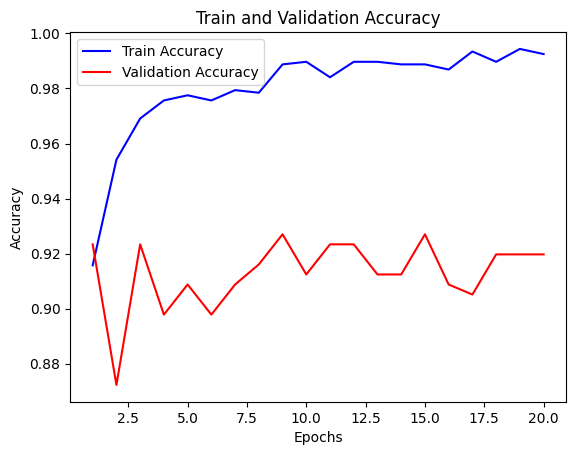

In [15]:
import matplotlib.pyplot as plt

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create a list of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the train and test accuracy curves
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

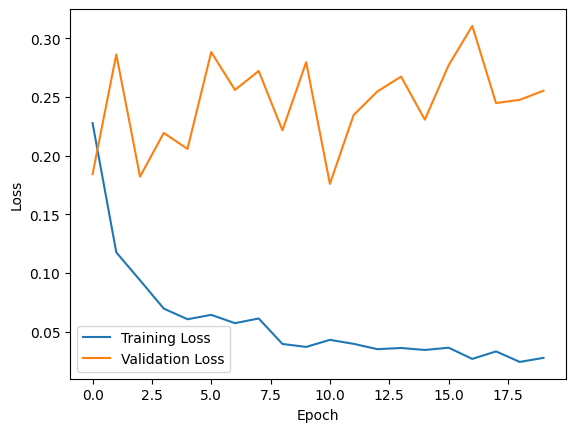

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
# Access the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
pred =model.predict(x=x_val, verbose = 1)
pred_class_indices = np.argmax(pred,axis=-1)
print('Predicted Labels :')
print(pred_class_indices)
print('\n')

org_class_indices = np.argmax(y_val,axis=-1)
print('Original Labels :')
print(org_class_indices)
print('\n')



score = model.evaluate(x_val,y_val, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\n')

#========================================================================================================================================

from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score
print('Precision :  {}'.format(precision_score(y_true=org_class_indices, y_pred=pred_class_indices,average = 'macro')))
print('Recall    :  {}'.format(recall_score(y_true=org_class_indices, y_pred=pred_class_indices,average='macro')))
print('Accuracy  :  {}'.format(accuracy_score(y_true=org_class_indices, y_pred=pred_class_indices)))
print('F1 Score  :  {}'.format(f1_score(y_true=org_class_indices, y_pred=pred_class_indices,average = 'macro')))

from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true=org_class_indices, y_pred=pred_class_indices)
print('\n')
print('Confusion Matrix  : ')
print(matrix)

9/9 [==============================] - 1s 76ms/step
Predicted Labels :
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Original Labels :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [18]:
cm1=matrix
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9197080291970803
Sensitivity :  0.8467153284671532
Specificity :  0.9927007299270073


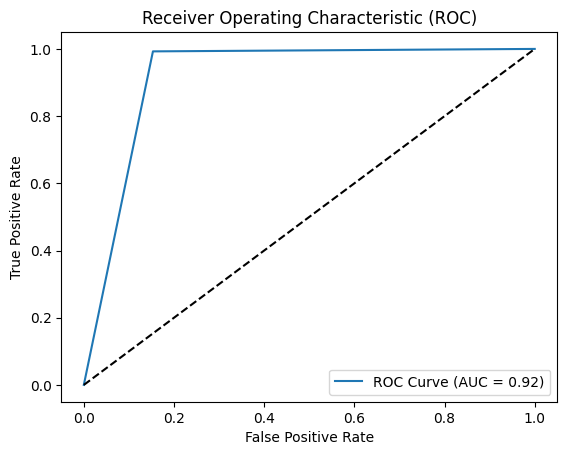

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming you have trained your model and obtained the predicted probabilities for the positive class
y_pred = pred_class_indices
y_true=org_class_indices

# Assuming the true labels for the test set are stored in y_true
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()



In [20]:
import numpy as np
from sklearn.metrics import average_precision_score

# Assuming you have the true labels and predicted scores for each class
# true_labels: array of true labels (binary) for each class
# predicted_scores: array of predicted scores (confidence or probability) for each class

# Step 1: Compute Average Precision (AP) for each class
ap_scores = []
true_labels_class = org_class_indices
predicted_scores_class = pred_class_indices
for class_index in range(2):
    ap = average_precision_score(true_labels_class, predicted_scores_class)
    ap_scores.append(ap)

# Step 2: Compute mAP
mAP = np.mean(ap_scores)

In [21]:
mAP

0.8635687386675346

In [22]:
# Save the model
model.save('hetero_Transfer_leraning_vgg16_SET1.h5')